# 薛定谔方程
---

Time-dependent Schrödinger equation (nonrelativistic version) 
$$i \hbar \frac{d}{d t}|\Psi(t)\rangle=\hat{H}|\Psi(t)\rangle$$

Holding the Hamiltonian $\hat{H}$ constant, the Schrödinger equation has the solution,
$$|\Psi(t)\rangle=e^{-i \hat{H} t / \hbar}|\Psi(0)\rangle$$
The operater $\hat{U}=e^{-i \hat{H} t / \hbar}$ is known as the time-evolution operator.

Wave functions can form standing waves, called stationary states, described by Time-independent Schrödinger equation,
$$\hat{H}|\Psi\rangle=E\Psi$$
where Hamiltonian operator $\hat{H}=-\frac{\hbar^{2}}{2 m} \nabla^{2}+V(\mathbf{r})$ in position space.

Second order linear differention in discrete space,
$$\frac{d^{2} f}{d x^{2}}=\lim _{h \rightarrow 0} \frac{f(x-h)-2 f(x)+f(x+h)}{h^{2}}$$  
[Laplace operator](https://en.wikipedia.org/wiki/Discrete_Laplace_operator)/Laplacian matrix applied on discrete coordinates in [a, b]
$$
\frac{d^{2} f}{d x^{2}}=\begin{bmatrix}\begin{array}{ccccccc}-2 & 1 & 0 & \ldots & 0 & 0 \\ 1 & -2 & 1 & \ldots & 0 & 0 \\ 0 & 1 & -2 & \ldots & 0 & 0 \\ \ldots & \ldots & \ldots & \ldots & \ldots & \ldots \\ 0 & 0 & 0 & \ldots & -2 & 1 \\ 0 & 0 & 0 & \ldots & 1 & -2\end{array}\end{bmatrix}\begin{bmatrix}\begin{array}{c}f(a) \\ f(a+h) \\ f(a+2 h) \\ \ldots \\ f(a+(n-2) h) \\ f(b)\end{array}\end{bmatrix} / h^{2}=\operatorname{Lap}|f\rangle
$$  

## 有限差分法求解一维定态薛定谔方程
---

新建一个名称为Schrodinger的Python类。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class Schrodinger:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar=1,
                 xmin=-5, xmax=5, ninterval=201):
        self.x = np.linspace(xmin, xmax, ninterval)
        self.Potential = np.diag(potential_func(self.x), 0)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, N):
        return (-2 * np.diag(np.ones((N), np.float32), 0)
            + np.diag(np.ones((N-1), np.float32), 1)
            + np.diag(np.ones((N-1), np.float32), -1))/(dx**2)
    def eig_solve(self):
        eigValue, eigVector = np.linalg.eigh(self.Hamiltonian)
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
    def plot_wavefunction(self, n):
        plt.plot(self.x, self.eigVector[:, n], label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        plt.ylabel(r'$\psi(x)$')
        plt.xlabel(r'$x$')
    def plot_density(self, n):
        density = abs(self.eigVector[:, n]) ** 2
        plt.plot(self.x, density, label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        plt.ylabel(r'$\rho(x)=\psi^*(x)\psi(x)$')
        plt.xlabel(r'$x$')

### 无限深方势井
---

Lowest Energies [0.04885965 0.1954268  0.43966598 0.78151812 1.22090054]


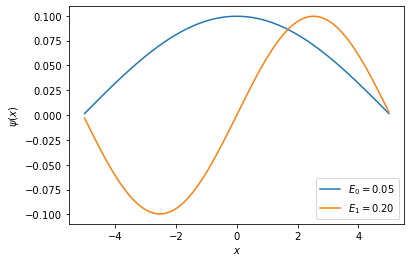

In [2]:
def infinite_square_potential(x):
    return np.zeros_like(x)

schro_infinite_square = Schrodinger(infinite_square_potential)
schro_infinite_square.eig_solve()
print("Lowest Energies", schro_infinite_square.eigEnergy[0:5])

schro_infinite_square.plot_wavefunction(n=0)
schro_infinite_square.plot_wavefunction(n=1)
plt.legend()

数值计算结果和解析解相符。

$$\phi_{n}=\sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}}$$
$$E_{n}=\frac{n^2h^2}{8mL^2}$$

粒子在简谐势阱中的分布概率密度

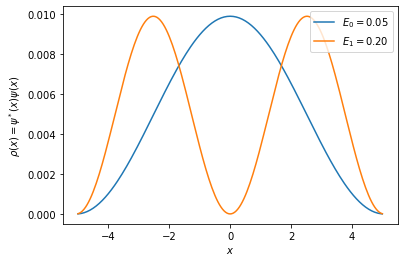

In [3]:
schro_infinite_square.plot_density(n=0)
schro_infinite_square.plot_density(n=1)
plt.legend()

### 简谐势井
---

Lowest Energies [ 1.58826291  4.76322391  7.93505298 11.10374544 14.26929662]


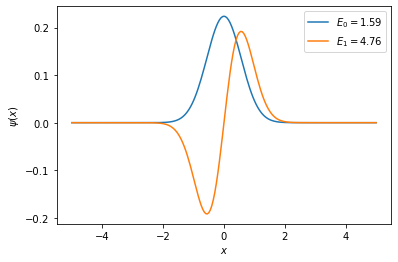

In [4]:
def harmonic_potential(x, k=10):
    return 0.5 * k * x**2

schro_harmonic = Schrodinger(harmonic_potential)
schro_harmonic.eig_solve()
print("Lowest Energies", schro_harmonic.eigEnergy[0:5])

schro_harmonic.plot_wavefunction(n=0)
schro_harmonic.plot_wavefunction(n=1)
plt.legend()

粒子在简谐势阱中的分布概率密度

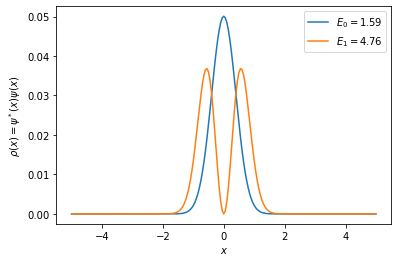

In [5]:
schro_harmonic.plot_density(n=0)
schro_harmonic.plot_density(n=1)
plt.legend()

### 有限深方势井
---

Lowest Energies [-48.92993246 -45.73298784 -40.45101567 -33.16247201 -24.0051611 ]


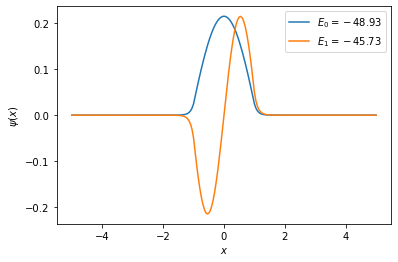

In [6]:
def square_well_potential(x, h=50):
    u = np.zeros_like(x)
    u[abs(x) < 1] = -h
    return u

schro_square_well = Schrodinger(square_well_potential)
schro_square_well.eig_solve()
print("Lowest Energies", schro_square_well.eigEnergy[0:5])

schro_square_well.plot_wavefunction(n=0)
schro_square_well.plot_wavefunction(n=1)
plt.legend()

粒子在有限深方势阱中的分布概率密度

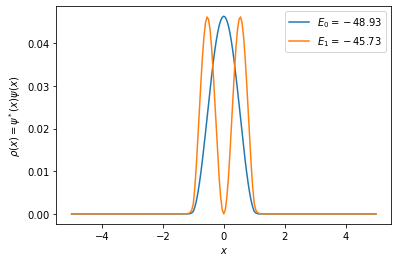

In [7]:
schro_square_well.plot_density(n=0)
schro_square_well.plot_density(n=1)
plt.legend()

### 双方势井
---


Lowest Energies [-12.18398547 -12.13090707   0.22845904   0.26652875   0.80552188]


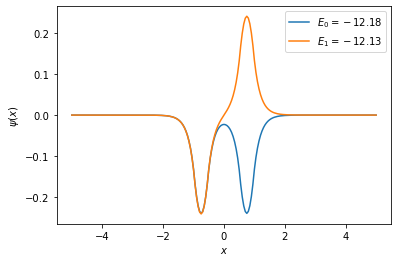

In [8]:
def double_well_potential(x, h=20):
    u = np.zeros_like(x)
    u[(abs(x) > 0.5) & (abs(x) < 1)] = -h
    return u

schro_double_well = Schrodinger(double_well_potential)
schro_double_well.eig_solve()
print("Lowest Energies", schro_double_well.eigEnergy[0:5])

schro_double_well.plot_wavefunction(n=0)
schro_double_well.plot_wavefunction(n=1)
plt.legend()

粒子在有限深双势阱中的分布概率密度

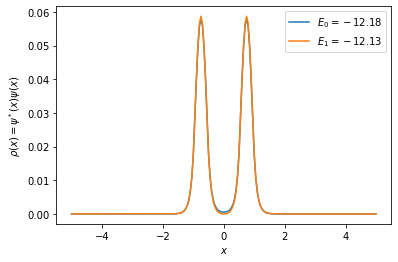

In [9]:
schro_double_well.plot_density(n=0)
schro_double_well.plot_density(n=1)
plt.legend()

可以看到，有限深双势井的基态是简并的，且粒子分布概率密度相同。

## 量子叠加态和含时薛定谔方程
---

Consider initial state to be a linear combination of groud state and 1st excitation state,
$$|\Psi(t=0)\rangle=(|\Psi_{E_{0}}\rangle + |\Psi_{E_{1}}\rangle)/\sqrt{2}$$
which is not stationary and its density distribution is time-dependent.
$$|\psi(t)\rangle=\frac{1}{\sqrt{2}}\left(\left|\psi_{E_{0}}\right\rangle \exp \left(\frac{-i E_{0} t}{\hbar}\right)+\left|\psi_{E_{1}}\right\rangle \exp \left(\frac{-i E_{1} t}{\hbar}\right)\right)$$
$$\rho(x, t)=\langle\psi(t)|\psi(t)\rangle=\frac{1}{2}\left[\left|\psi_{E_{0}}(x)\right|^{2}+\left|\psi_{E_{1}}(x)\right|^{2}+2\left|\psi_{E_{0}}(x)\right|\left|\psi_{E_{1}}(x)\right| \cos \left(\frac{(E_{0}-E_{1}) t}{\hbar}\right)\right]$$

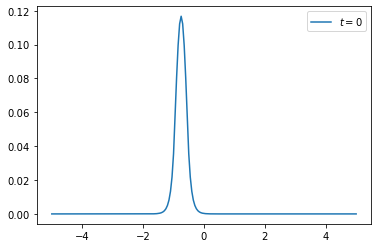

In [10]:
def psit(t, hbar = 1):
    psi0 = schro_double_well.eigVector[:, 0]
    psi1 = schro_double_well.eigVector[:, 1]
    E0 = schro_double_well.eigEnergy[0]
    E1 = schro_double_well.eigEnergy[1]
    return 1/np.sqrt(2) * (psi0 * np.exp(-1j * E0 * t/hbar)
                        +  psi1 * np.exp(-1j * E1 * t/hbar))

density = abs(psit(0)) ** 2
plt.plot(schro_double_well.x, density, label = r'$t = 0$')
plt.legend()

The partical is oscillating between the two wells with a period of $\frac{2\pi\hbar}{E_{0}-E_{1}}$

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
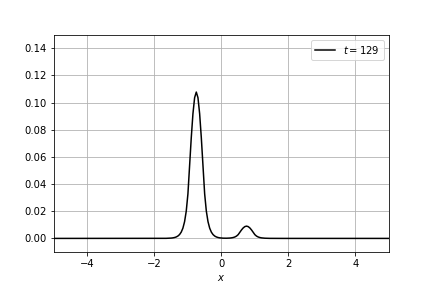

In [11]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class UpdateDist:
    def __init__(self, ax, x):
        self.success = 0
        self.line, = ax.plot([], [], 'k-')
        self.x = x
        self.ax = ax
        # Set up plot parameters
        self.ax.set_xlim(-5, 5)
        self.ax.set_ylim(-0.01, 0.15)
        self.ax.grid(True)
    def __call__(self, i):
        time = i * 1
        psi = psit(t = time)
        density = np.abs(psi) ** 2
        self.line.set_data(self.x, density)
        self.line.set_label(r'$t=%s$'%(time))
        self.ax.legend()
        return self.line,

fig, ax = plt.subplots()
ax.set_xlabel(r'$x$')
ud = UpdateDist(ax, x=schro_double_well.x)
ani = FuncAnimation(fig, ud, frames=130, interval=100, blit=True)
ani.save('DoubleWell.gif', writer='imagemagick', fps=20)

In [18]:
from IPython.display import Image
Image(url='DoubleWell.gif')

可以发现：

1. 对于一维非奇性势能运动，粒子运动不简并，第n个激发态有n个零点。
2. 对于双无限深势井，第n和n+1个激发态能量兼并。对应的物理图像是粒子无法穿越无限高势垒。

## 基矢变换
---
选择一组基函数（基矢），将原函数表示为基函数的线性组合。原问题转变为求解基函数的组合系数。

$$\phi_{n}=\sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}}$$
$$\phi_{old} = A \phi_{new}$$
$$H_{new} = A^T H_{old} A$$

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class Schrodinger_basis_set:
    ''' H|psi> = E |psi> '''
    def __init__(self, potential_func,
                 mass = 1, hbar=1,
                 xmin=-5, xmax=5, ninterval=101):
        self.xmin = xmin
        self.xmax = xmax
        self.ninterval = ninterval
        self.x = np.linspace(xmin, xmax, ninterval)
        self.Potential = np.diag(potential_func(self.x), 0)
        self.Lap = self.laplacian((xmax - xmin)/ninterval, ninterval)
        self.Hamiltonian = - hbar**2 / (2*mass) * self.Lap + self.Potential
    def laplacian(self, dx, N):
        return (-2 * np.diag(np.ones((N), np.float32), 0)
            + np.diag(np.ones((N-1), np.float32), 1)
            + np.diag(np.ones((N-1), np.float32), -1))/(dx**2)        
    def basis_set(self, ninterval, N):
        phi = np.zeros(ninterval)
        for i in range(ninterval):
            phi[i] = np.sqrt(2/ninterval) * np.sin((N+1)*np.pi*i/ninterval)
        return phi
    def eig_solve(self, nmax):
        ''' X_old = A X_new '''
        self.transition_matrix = np.zeros([self.ninterval, nmax])
        for n in range(nmax):
            self.transition_matrix[:,n] = self.basis_set(self.ninterval, n)
        Hamiltonian_new = self.transition_matrix.T@self.Hamiltonian@self.transition_matrix
        eigValue, eigVector = np.linalg.eigh(Hamiltonian_new)  
        idx_sorted = np.argsort(eigValue)
        self.eigEnergy = eigValue[idx_sorted]
        self.eigVector = eigVector[:, idx_sorted]
    def plot_wavefunction(self, n):
        plt.plot(self.x, self.transition_matrix@self.eigVector[:, n], label=r'$E_{%s}=%.2f$'%(n, self.eigEnergy[n]))
        plt.ylabel(r'$\psi(x)$')
        plt.xlabel(r'$x$')


我们使用的基函数是无限深方势阱的本征态。对于无限深方势阱，求解基矢变换后的矩阵的本征值不会产生额外误差。

Energy [0.04934404 0.19732843 0.44380999 0.78855028 1.23121578]


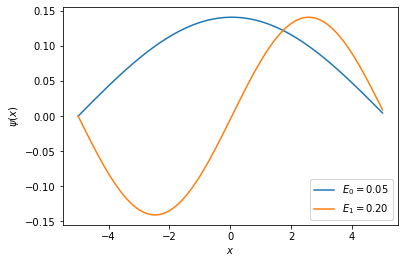

In [14]:
schro_bs_infinite_square = Schrodinger_basis_set(infinite_square_potential)
schro_bs_infinite_square.eig_solve(10)
print("Energy", schro_bs_infinite_square.eigEnergy[:5])

schro_bs_infinite_square.plot_wavefunction(0)
schro_bs_infinite_square.plot_wavefunction(1)
plt.legend()

对于其他类型的势井，例如简谐势井，如果基矢组规模较小，拟合效果就会比较差。计算得到的本征值也会产生较大偏差。

Energy [ 1.7676504   5.48973683 11.64370132 17.02963866 29.25256856]


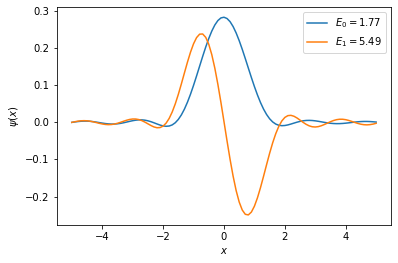

In [15]:
def harmonic_potential(x, k=10):
    return 0.5 * k * x**2

schro_bs_harmonic = Schrodinger_basis_set(harmonic_potential)
schro_bs_harmonic.eig_solve(10)
print("Energy", schro_bs_harmonic.eigEnergy[0:5])

schro_bs_harmonic.plot_wavefunction(0)
schro_bs_harmonic.plot_wavefunction(1)
plt.legend()

通过增加基矢数量，可以消除上述误差。

Energy [ 1.59384065  4.77539452  7.94982418 11.11954475 14.41303302]


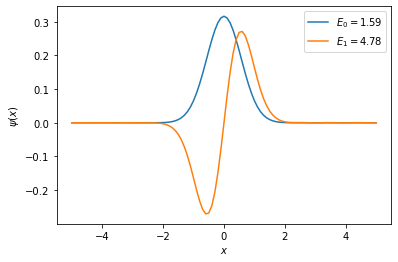

In [16]:
schro_bs_harmonic.eig_solve(20)
print("Energy", schro_bs_harmonic.eigEnergy[0:5])

schro_bs_harmonic.plot_wavefunction(0)
schro_bs_harmonic.plot_wavefunction(1)
plt.legend()